## Dataset Summary

Meet your primary tool: the `insurance.csv` dataset. Packed with information on health insurance customers, this dataset is your key to unlocking patterns in healthcare costs. Here's what you need to know about the data you'll be working with:

## insurance.csv
| Column    | Data Type | Description                                                      |
|-----------|-----------|------------------------------------------------------------------|
| `age`       | int       | Age of the primary beneficiary.                                  |
| `sex`       | object    | Gender of the insurance contractor (male or female).             |
| `bmi`       | float     | Body mass index, a key indicator of body fat based on height and weight. |
| `children`  | int       | Number of dependents covered by the insurance plan.              |
| `smoker`    | object    | Indicates whether the beneficiary smokes (yes or no).            |
| `region`    | object    | The beneficiary's residential area in the US, divided into four regions. |
| `charges`   | float     | Individual medical costs billed by health insurance.             |



A bit of data cleaning is key to ensure the dataset is ready for modeling. Once your model is built using the `insurance.csv` dataset, the next step is to apply it to the `validation_dataset.csv`. This new dataset, similar to your training data minus the `charges` column, tests your model's accuracy and real-world utility by predicting costs for new customers.

## Let's Get Started!

This project is your playground for applying data science in a meaningful way, offering insights that have real-world applications. Ready to explore the data and uncover insights that could revolutionize healthcare planning? Let's begin this exciting journey!

In [172]:
# Importando bibliotecas necessárias
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

# Criando o df insurance
insurance_data_path = 'insurance.csv'
insurance = pd.read_csv(insurance_data_path)
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.924
1,18.0,male,33.770,1.0,no,Southeast,1725.5523
2,28.0,male,33.000,3.0,no,southeast,$4449.462
3,33.0,male,22.705,0.0,no,northwest,$21984.47061
4,32.0,male,28.880,0.0,no,northwest,$3866.8552


Análise Exploratória de Dados

In [173]:
## Explorando o dataset:

insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1272 non-null   float64
 1   sex       1272 non-null   object 
 2   bmi       1272 non-null   float64
 3   children  1272 non-null   float64
 4   smoker    1272 non-null   object 
 5   region    1272 non-null   object 
 6   charges   1284 non-null   object 
dtypes: float64(3), object(4)
memory usage: 73.3+ KB


In [174]:
insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [175]:
insurance[['age', 'bmi', 'children']].describe()

,age,bmi,children
count,1272.000000,1272.000000,1272.000000
mean,35.214623,30.560550,0.948899
std,22.478251,6.095573,1.303532
min,-64.000000,15.960000,-4.000000
25%,24.750000,26.180000,0.000000
50%,38.000000,30.210000,1.000000
75%,51.000000,34.485000,2.000000
max,64.000000,53.130000,5.000000


In [176]:
insurance[['smoker', 'region', 'charges']].describe()

,smoker,region,charges
count,1272,1272,1284
unique,2,8,1272
top,no,Southeast,$nan
freq,1013,172,12


In [177]:
insurance['sex'].describe()

count     1272
unique       6
top       male
freq       517
Name: sex, dtype: object

In [178]:
## Droppando os NAs.
insurance.dropna(inplace = True)

insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [179]:
## Padronizando as classes para 'sex'
insurance['sex'] = insurance['sex'].replace({
    'M':'male', 'man':'male', 'F':'female', 'woman':'female'
})

insurance['sex'].unique()

array(['female', 'male'], dtype=object)

In [180]:
## Explorando e limpando Region 
insurance['region'] = insurance['region'].str.lower()
## Aqui foi somente necessário converter tudo p/ Lower case

insurance['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [181]:
## Explorando e limpando Charges
insurance['charges'] = insurance['charges'].replace({'\$':''},
                           regex = True).astype(float)

print(insurance['charges'].dtype)

print(insurance['charges'].unique())

float64
[16884.924   1725.5523  4449.462  ...  1629.8335  2007.945  29141.3603]


In [182]:
## Filtrando valores negativos dos numéricos 
insurance = insurance[insurance['age'] > 0] ## Somente idade positivas; algumas estão negativas

## Zerando as 'crianças' negativas; Não faz sentido.
insurance.loc[insurance['children'] < 0, 'children'] = 0

In [183]:
## Confirmando alterações
print(insurance.info())

print(insurance.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1149 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1149 non-null   float64
 1   sex       1149 non-null   object 
 2   bmi       1149 non-null   float64
 3   children  1149 non-null   float64
 4   smoker    1149 non-null   object 
 5   region    1149 non-null   object 
 6   charges   1149 non-null   float64
dtypes: float64(4), object(3)
memory usage: 71.8+ KB
None
               age          bmi     children       charges
count  1149.000000  1149.000000  1149.000000   1149.000000
mean     39.204526    30.592620     1.017406  13331.073243
std      14.163214     6.124013     1.192183  12171.162115
min      18.000000    15.960000     0.000000   1121.873900
25%      26.000000    26.200000     0.000000   4746.344000
50%      39.000000    30.300000     1.000000   9541.695550
75%      51.000000    34.700000     2.000000  16577.779500
max      64.0

In [184]:
insurance = insurance.reset_index(drop = True)

insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.92400
1,18.0,male,33.770,1.0,no,southeast,1725.55230
2,28.0,male,33.000,3.0,no,southeast,4449.46200
3,33.0,male,22.705,0.0,no,northwest,21984.47061
4,32.0,male,28.880,0.0,no,northwest,3866.85520


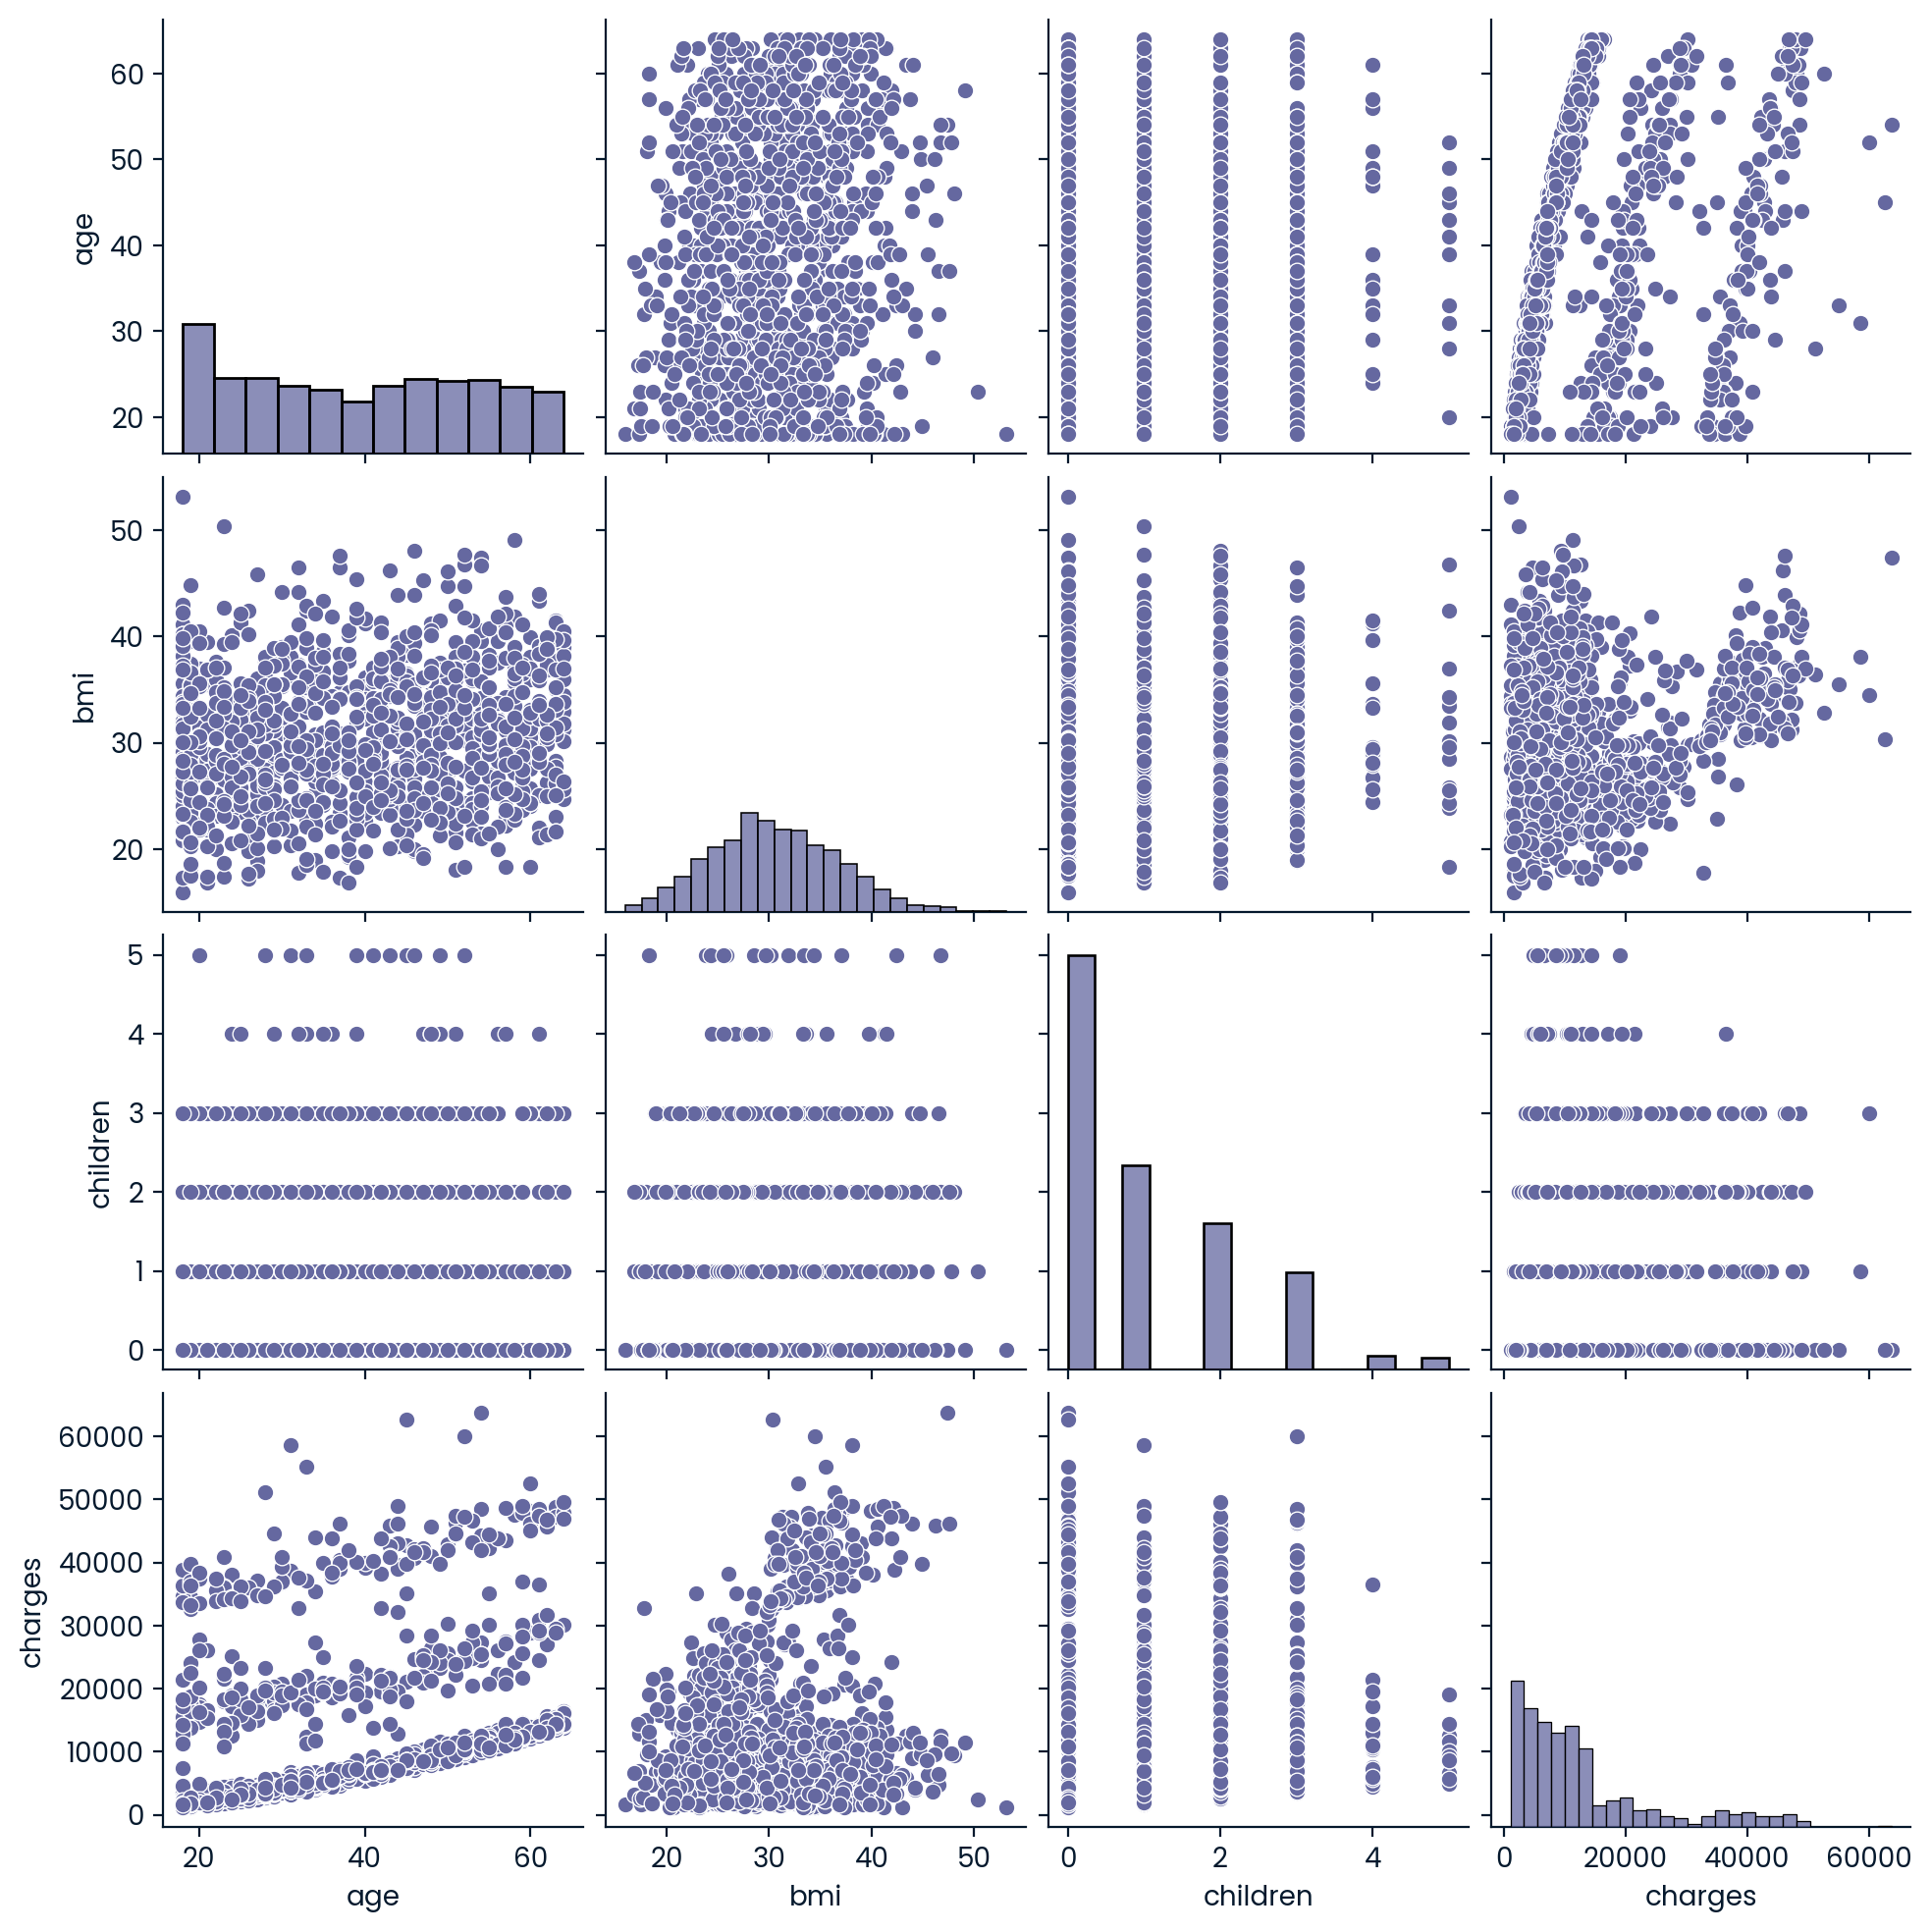

In [185]:
sns.pairplot(insurance)

In [186]:
## BMi parece ruim e, potanto, vou removê-lo

Criando o modelo de regressão linear

In [187]:
## Selecionando as variáveis

# Pré-processamento
X = insurance.drop(['charges'], axis = 1)
y = insurance['charges']

## Transformando as categóricas ('sex', 'smoker', 'region') 
X = pd.get_dummies(X, columns = ['sex', 'smoker', 'region'])

X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19.0,27.900,0.0,1,0,0,1,0,0,0,1
1,18.0,33.770,1.0,0,1,1,0,0,0,1,0
2,28.0,33.000,3.0,0,1,1,0,0,0,1,0
3,33.0,22.705,0.0,0,1,1,0,0,1,0,0
4,32.0,28.880,0.0,0,1,1,0,0,1,0,0


In [188]:
## Removendo as covariadas que representam coisas similares; .. Exclusão
colunas_selecionadas = ['age', 'children', 'bmi', 'sex_female', 'smoker_yes', 'region_northeast','region_northwest', 'region_southeast', 'region_southwest']
X = X[colunas_selecionadas]

X.head()

,age,children,bmi,sex_female,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19.0,0.0,27.900,1,1,0,0,0,1
1,18.0,1.0,33.770,0,0,0,0,1,0
2,28.0,3.0,33.000,0,0,0,0,1,0
3,33.0,0.0,22.705,0,0,0,1,0,0
4,32.0,0.0,28.880,0,0,0,1,0,0


In [189]:
## Aplicando Standard Scaler para normalização dos dados usados.
scaler = StandardScaler()

X_normalized = scaler.fit_transform(X)

## Iniciando a Reg. Linear
reglin = LinearRegression()

In [190]:
X_normalized_df = pd.DataFrame(X_normalized)

X_normalized_df.head() ## Apenas para uma visualização da normalização

,0,1,2,3,4,5,6,7,8
0,-1.427171,-0.853770,-0.439874,1.014907,1.961658,-0.567635,-0.570315,-0.605170,1.765865
1,-1.497807,-0.014607,0.519066,-0.985312,-0.509773,-0.567635,-0.570315,1.652428,-0.566295
2,-0.791445,1.663719,0.393276,-0.985312,-0.509773,-0.567635,-0.570315,1.652428,-0.566295
3,-0.438264,-0.853770,-1.288543,-0.985312,-0.509773,-0.567635,1.753416,-0.605170,-0.566295
4,-0.508900,-0.853770,-0.279778,-0.985312,-0.509773,-0.567635,1.753416,-0.605170,-0.566295


In [191]:
## Montando o modelo via Pipeline
model = Pipeline([
        ('scaler', scaler),
    ('reglin', reglin)
])

# fazendo o Fit
model.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()), ('reglin', LinearRegression())])

In [192]:
## Avaliando o modelo com Cross Validation

# MSE
mse = np.mean(-cross_val_score(model, X_normalized, y, cv = 6, scoring = 'neg_mean_squared_error'))

# R Quadrado
r2_score = np.mean(cross_val_score(model, X_normalized, y, cv = 6, scoring = 'r2'))

# MAPE
mape = np.mean(-cross_val_score(model, X_normalized, y, cv = 6, scoring='neg_mean_absolute_percentage_error'))

print(mape) # Não ficou bom...
print(mse) # Não ficou muito bom também não..
print(r2_score)

0.424095335281032
37737047.567442425
0.7420331517282076


Aplicando o modelo no dataset de variação

In [193]:
# Carregando os dados de validação
validation_data = pd.read_csv('validation_dataset.csv')

validation_data.head()  

,age,sex,bmi,children,smoker,region
0,18.0,female,24.090000,1.0,no,southeast
1,39.0,male,26.410000,0.0,yes,northeast
2,27.0,male,29.150000,0.0,yes,southeast
3,71.0,male,65.502135,13.0,yes,southeast
4,28.0,male,38.060000,0.0,no,southeast


In [194]:
## Explorando rapidamente esse dataset de validação

validation_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
dtype: int64

In [195]:
validation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       50 non-null     float64
 1   sex       50 non-null     object 
 2   bmi       50 non-null     float64
 3   children  50 non-null     float64
 4   smoker    50 non-null     object 
 5   region    50 non-null     object 
dtypes: float64(3), object(3)
memory usage: 2.5+ KB


In [196]:
## Transformando as categóricas ('sex', 'smoker', 'region') 
validation_data = pd.get_dummies(validation_data, columns = ['sex', 'smoker', 'region'])

validation_data.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,18.0,24.090000,1.0,1,0,1,0,0,0,1,0
1,39.0,26.410000,0.0,0,1,0,1,1,0,0,0
2,27.0,29.150000,0.0,0,1,0,1,0,0,1,0
3,71.0,65.502135,13.0,0,1,0,1,0,0,1,0
4,28.0,38.060000,0.0,0,1,1,0,0,0,1,0


In [197]:
# Selecionando colunas
validation_data = validation_data[colunas_selecionadas]

In [198]:
## Fazendo a predição com o modelo criado, que também normaliza ela.
prediction = model.predict(validation_data)

In [199]:
validation_data['predicted_charges'] = prediction

validation_data.head()

,age,children,bmi,sex_female,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,predicted_charges
0,18.0,1.0,24.090000,1,0,0,0,1,0,508.145323
1,39.0,0.0,26.410000,0,1,1,0,0,0,30947.521922
2,27.0,0.0,29.150000,0,1,0,0,1,0,27951.157717
3,71.0,13.0,65.502135,0,1,0,0,1,0,56291.274683
4,28.0,0.0,38.060000,0,0,0,0,1,0,7147.814884


In [200]:
## Aplicando a regra de negócio: <1000 == 1000
validation_data.loc[validation_data['predicted_charges'] < 1000, 'predicted_charges'] = 1000

In [201]:
validation_data.head()

,age,children,bmi,sex_female,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,predicted_charges
0,18.0,1.0,24.090000,1,0,0,0,1,0,1000.000000
1,39.0,0.0,26.410000,0,1,1,0,0,0,30947.521922
2,27.0,0.0,29.150000,0,1,0,0,1,0,27951.157717
3,71.0,13.0,65.502135,0,1,0,0,1,0,56291.274683
4,28.0,0.0,38.060000,0,0,0,0,1,0,7147.814884


<AxesSubplot: xlabel='predicted_charges', ylabel='Count'>

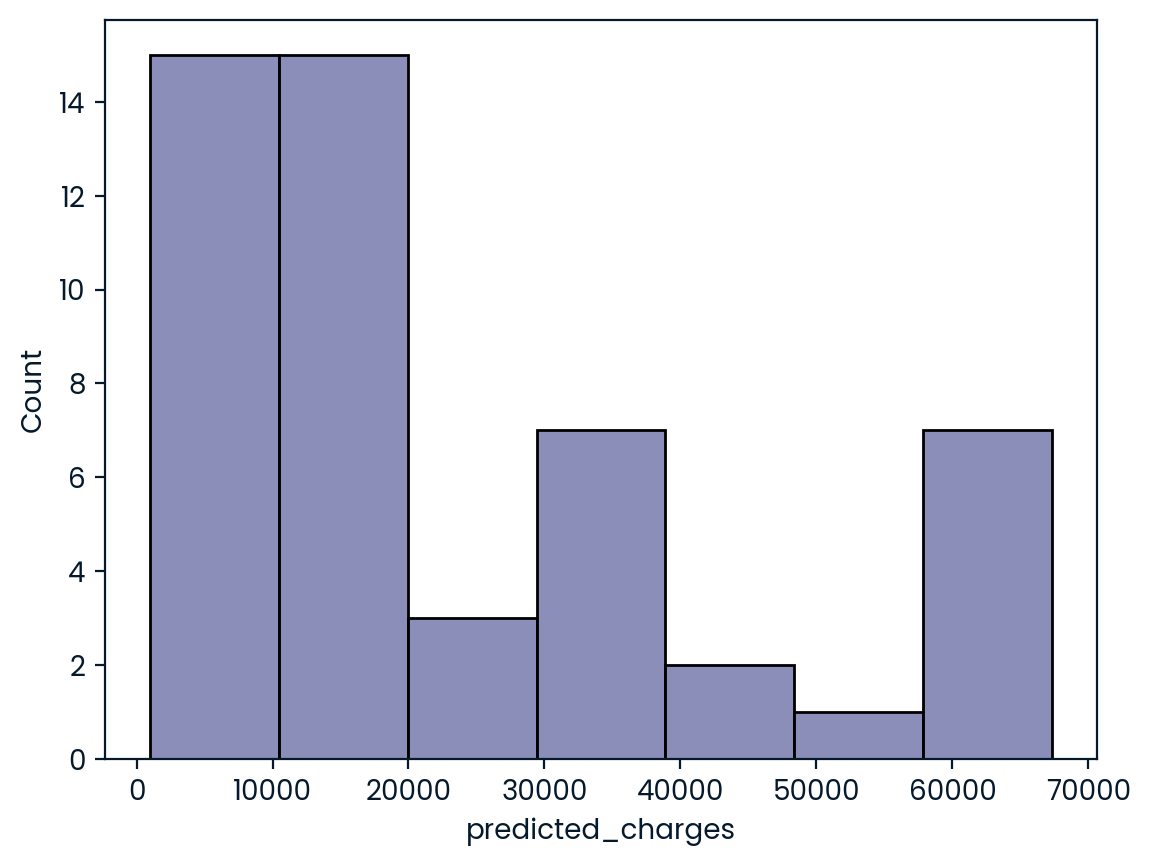

In [202]:
sns.histplot(data=validation_data, x='predicted_charges')